In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read time data
trainM = pd.read_csv("./for_erik/train_mean.tsv", sep='\t', index_col=0)
testM = pd.read_csv("./for_erik/test_mean.tsv", sep='\t', index_col=0)
totalM = pd.read_csv("./for_erik/total_mean.tsv", sep='\t', index_col=0)

seurat_time = np.load('./Erik/seurat_time.npy')
seurat_time = np.expm1(seurat_time)
tm_cluster = np.array([4.52940433422724, 1.18159772157669, 1.40544383525848, 9.46595265070597, 3.9286373813947,
              28.5646874944369, 23.2505677700043, 28.5458539287249])*60
seurat_time = seurat_time + tm_cluster

seurat_time[3,5:8] = 0  #'sccatch'
seurat_time[5,5:7] = 0  #'adobo'

In [3]:
dataset_list = ['Tirosh','Chung','Li','Jerby Arnon','Darmanis',
                'van Galan','Lambrechts','Peng']

order_by_cell = ['Li','Chung','Darmanis','Tirosh','Jerby Arnon','van Galan',
                 'Lambrechts','Peng']
order_by_type = ['Li','Chung','van Galan','Tirosh','Darmanis','Jerby Arnon',
                'Peng','Lambrechts']
order_by_gene = ['Lambrechts','Darmanis','Tirosh','Jerby Arnon','Peng',
                 'van Galan','Li','Chung']

ind_by_cell = [dataset_list.index(item) for item in order_by_cell]
ind_by_type = [dataset_list.index(item) for item in order_by_type]
ind_by_gene = [dataset_list.index(item) for item in order_by_gene]

method_list = ["CaSTLe","Cell_BLAST","kNN9","LAmbDA","LDA","LDArej","NMC","RF",
                "scmapcell","scmapcluster","scPred","SingleCellNet","SVM","SVMrej",
                "scVI","ACTINN","scID","CHETAH","singleR",'gsva','ora','cibersort',
                'sccatch','gsea','adobo','metaneighbor']

rank_method = ["CaSTLe","scVI","SVM","SingleCellNet","ACTINN","SVMrej","singleR",
               "LDA","LDArej","RF","CHETAH","LAmbDA","kNN9","scmapcell","NMC",
               "scPred","Cell_BLAST","scID","scmapcluster",
               'gsva','ora','cibersort','sccatch','gsea','adobo','metaneighbor']

ind_method = [method_list.index(item) for item in rank_method]

mtx = np.concatenate((trainM+testM, totalM), axis = 0)

mtx = np.concatenate((mtx, seurat_time), axis = 0)

mtx = np.log1p(mtx)

In [4]:
mask = np.argwhere(mtx == 0)
for k in range(mask.shape[0]):
    mtx[mask[k,0],mask[k,1]] = np.nan

In [5]:
df1 = pd.DataFrame(mtx[:,ind_by_cell][ind_method,:], index=rank_method, columns=order_by_cell)
df2 = pd.DataFrame(mtx[:,ind_by_type][ind_method,:], index=rank_method, columns=order_by_type)
df3 = pd.DataFrame(mtx[:,ind_by_gene][ind_method,:], index=rank_method, columns=order_by_gene)

mask1 = df1.isnull()
mask2 = df2.isnull()
mask3 = df3.isnull()

In [6]:
#save for Erik
df1.to_csv('./df_for_heatmap.tsv', sep='\t')

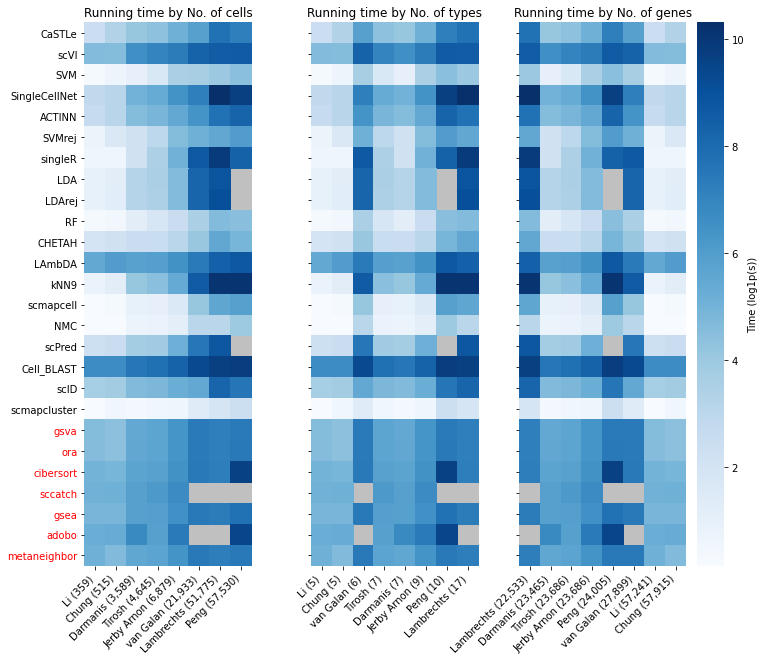

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,10))

sns.heatmap(df1, cmap='Blues', square=True, cbar=False, ax=ax1, mask=mask1)

sns.heatmap(df2, cmap='Blues', square=True, cbar=False, ax=ax2, mask=mask2)

sns.heatmap(df3, cmap='Blues', square=True, ax=ax3, mask=mask3,
                  cbar_kws={'label': 'Time (log1p(s))'})

xlabels_cell = ['Li (359)','Chung (515)','Darmanis (3,589)','Tirosh (4,645)',
                'Jerby Arnon (6,879)','van Galan (21,933)','Lambrechts (51,775)','Peng (57,530)']
xlabels_type = ['Li (5)','Chung (5)','van Galan (6)','Tirosh (7)','Darmanis (7)','Jerby Arnon (9)',
                'Peng (10)','Lambrechts (17)']
xlabels_gene = ['Lambrechts (22,533)','Darmanis (23,465)','Tirosh (23,686)','Jerby Arnon (23,686)','Peng (24,005)',
                 'van Galan (27,899)','Li (57,241)','Chung (57,915)']


ax1.set_xticklabels(xlabels_cell, rotation = 45, ha="right")
ax2.set_xticklabels(xlabels_type, rotation = 45, ha="right")
ax3.set_xticklabels(xlabels_gene, rotation = 45, ha="right")

ax1.set_facecolor('silver')
ax2.set_facecolor('silver')
ax3.set_facecolor('silver')

#ax1.tick_params(axis='y', colors= )

axc = ['black' for i in range(19)]+['red' for i in range(7)]
for ytick, col in zip(ax1.get_yticklabels(), axc):
    ytick.set_color(col)

ax1.title.set_text('Running time by No. of cells')
ax2.title.set_text('Running time by No. of types')
ax3.title.set_text('Running time by No. of genes')

#plt.title("Running time ordered by No. of cells")
plt.subplots_adjust(wspace = 0.05)
#plt.show()
plt.savefig("Heatmap.png", bbox_inches='tight')